In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, r'D:\9th semester\git\ML_Spring_23_24\Mid\assignments\KNN-HW')  # Insert the path to the directory containing data_utils.py
import data_utils
from tqdm import tqdm

def download_data():
    pass  # Since you're loading data from your local directory, no need to download

# Class to initialize and apply K-nearest neighbor classifier
class KNearestNeighbor(object):
    def __init__(self):
        pass

    # Method to initialize classifier with training data
    def train(self, X, y):
        self.X_train = X
        self.y_train = y

    # Method to predict labels of test examples using 'compute_distances' and 'predict_labels' methods.
    def predict(self, X, k=1, num_loops=0):
        if num_loops == 0:
            dists = self.compute_distances(X)
        else:
            raise ValueError('Invalid value %d for num_loops' % num_loops)
        return self.predict_labels(dists, k=k)

    # Method to compute Euclidean distances from each text example to every training example
    def compute_distances(self, X):
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test, num_train))
        for i in tqdm(range(num_test), desc="Computing Distances"):
            dists[i, :] = np.linalg.norm(self.X_train - X[i, :], axis=1)
        return dists

    # Method to predict labels of test examples using chosen value of k given Euclidean distances obtained from 'compute_distances' method.
    def predict_labels(self, dists, k=1):
        num_test = dists.shape[0]
        y_pred = np.zeros(num_test)
        for i in range(num_test):
            closest_y = []
            indices = np.argsort(dists[i, :])
            closest_y = self.y_train[indices[:k]]
            y_pred[i] = np.argmax(np.bincount(closest_y))
        return y_pred

def visualize_data(X_train, y_train):
    classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    num_classes = len(classes)
    samples_per_class = 7
    for y, cls in enumerate(classes):
        idxs = np.flatnonzero(y_train == y)
        idxs = np.random.choice(idxs, samples_per_class, replace=False)
        for i, idx in enumerate(idxs):
            plt_idx = i * num_classes + y + 1
            plt.subplot(samples_per_class, num_classes, plt_idx)
            plt.imshow(X_train[idx].astype('uint8'))
            plt.axis('off')
            if i == 0:
                plt.title(cls)
    plt.show()

if __name__ == "__main__":

    # Download CIFAR10 data and store it in current directory if you have not done it.
    # download_data()
    cifar10_dir = r'D:\9th semester\git\ML_Spring_23_24\Mid\assignments\KNN-HW\cifar-10-batches-py'

    # Load training and testing data from CIFAR10 dataset
    X_train, y_train, X_test, y_test = data_utils.load_CIFAR10(cifar10_dir)

    # Checking the size of the training and testing data
    print('Training data shape: ', X_train.shape)
    print('Training labels shape: ', y_train.shape)
    print('Test data shape: ', X_test.shape)
    print('Test labels shape: ', y_test.shape)

    # Visualize the data if you want
    # visualize_data(X_train, y_train)

    # Memory error prevention by subsampling data. We sample 10000 training examples and 1000 test examples.
    num_training = 10000
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]

    num_test = 1000
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # YOUR CODE HERE
    # Reshape data and place into rows. Flatten the training and test data so each row 
    # consists of all pixels of an example
    X_train = np.reshape(X_train, (X_train.shape[0], -1))
    X_test = np.reshape(X_test, (X_test.shape[0], -1))
    print(X_train.shape, X_test.shape)  # X_train should be (10000, 3072) and X_test should be (1000, 3072)

    # Performing KNN
    classifier = KNearestNeighbor()

    # Use the KNearestNeighbour classifier to do as follows:
    # 1) Initialize classifier with training data
    # 2) Use classifier to compute distances from each test example in X_test to every training example
    # 3) Use classifier to predict labels of each test example in X_test using k=5
    classifier.train(X_train, y_train)
    y_test_pred = classifier.predict(X_test, k=5)

    num_correct = np.sum(y_test_pred == y_test)  # number of test examples correctly predicted
    accuracy = float(num_correct) / num_test
    print('Got %d / %d correct with k=5 => accuracy: %f' % (num_correct, num_test, accuracy))
    # Accuracy above should be ~ 29-30%


Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)
(10000, 3072) (1000, 3072)


Computing Distances: 100%|██████████| 1000/1000 [03:10<00:00,  5.26it/s]


Got 296 / 1000 correct with k=5 => accuracy: 0.296000


Computing Distances: 100%|██████████| 200/200 [00:03<00:00, 64.68it/s]


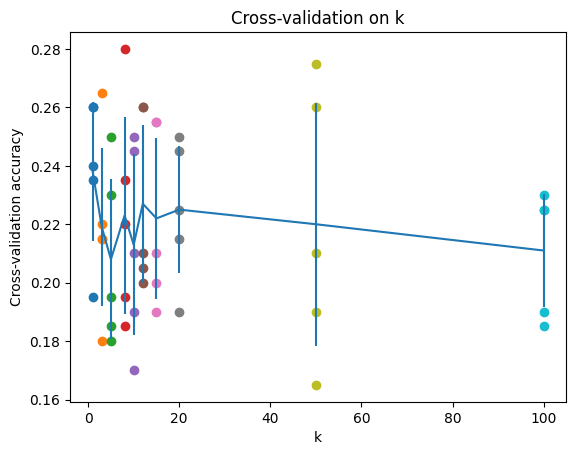

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, r'D:\9th semester\git\ML_Spring_23_24\Mid\assignments\KNN-HW')  # Insert the path to the directory containing data_utils.py
import data_utils
from tqdm import tqdm

def download_data():
    pass  # Since you're loading data from your local directory, no need to download

# Class to initialize and apply K-nearest neighbor classifier
class KNearestNeighbor(object):
    def __init__(self):
        pass

    # Method to initialize classifier with training data
    def train(self, X, y):
        self.X_train = X
        self.y_train = y

    # Method to predict labels of test examples using 'compute_distances' and 'predict_labels' methods.
    def predict(self, X, k=1, num_loops=0):
        if num_loops == 0:
            dists = self.compute_distances(X)
        else:
            raise ValueError('Invalid value %d for num_loops' % num_loops)
        return self.predict_labels(dists, k=k)

    # Method to compute Euclidean distances from each text example to every training example
    def compute_distances(self, X):
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test, num_train))
        for i in tqdm(range(num_test), desc="Computing Distances"):
            dists[i, :] = np.linalg.norm(self.X_train - X[i, :], axis=1)
        return dists

    # Method to predict labels of test examples using chosen value of k given Euclidean distances obtained from 'compute_distances' method.
    def predict_labels(self, dists, k=1):
        num_test = dists.shape[0]
        y_pred = np.zeros(num_test)
        for i in range(num_test):
            closest_y = []
            indices = np.argsort(dists[i, :])
            closest_y = self.y_train[indices[:k]]
            y_pred[i] = np.argmax(np.bincount(closest_y))
        return y_pred

def visualize_data(X_train, y_train):
    classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    num_classes = len(classes)
    samples_per_class = 7
    for y, cls in enumerate(classes):
        idxs = np.flatnonzero(y_train == y)
        idxs = np.random.choice(idxs, samples_per_class, replace=False)
        for i, idx in enumerate(idxs):
            plt_idx = i * num_classes + y + 1
            plt.subplot(samples_per_class, num_classes, plt_idx)
            plt.imshow(X_train[idx].astype('uint8'))
            plt.axis('off')
            if i == 0:
                plt.title(cls)
    plt.show()

def cross_validation(X_train, y_train, k_choices, num_folds=5):
    X_train_folds = np.array_split(X_train, num_folds)
    y_train_folds = np.array_split(y_train, num_folds)
    k_to_accuracies = {}

    for k in k_choices:
        k_to_accuracies[k] = []

        for i in range(num_folds):
            X_val_fold = X_train_folds[i]
            y_val_fold = y_train_folds[i]
            X_train_fold = np.concatenate(X_train_folds[:i] + X_train_folds[i+1:])
            y_train_fold = np.concatenate(y_train_folds[:i] + y_train_folds[i+1:])

            classifier = KNearestNeighbor()
            classifier.train(X_train_fold, y_train_fold)
            y_val_pred = classifier.predict(X_val_fold, k=k)
            num_correct = np.sum(y_val_pred == y_val_fold)
            accuracy = float(num_correct) / X_val_fold.shape[0]
            k_to_accuracies[k].append(accuracy)

    return k_to_accuracies

if __name__ == "__main__":

    # Download CIFAR10 data and store it in current directory if you have not done it.
    # download_data()
    cifar10_dir = r'D:\9th semester\git\ML_Spring_23_24\Mid\assignments\KNN-HW\cifar-10-batches-py'

    # Load training and testing data from CIFAR10 dataset
    X_train, y_train, X_test, y_test = data_utils.load_CIFAR10(cifar10_dir)

    # Memory error prevention by subsampling data. We sample 1000 training examples and 100 test examples.
    num_training = 1000
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]

    num_test = 100
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Reshape data and place into rows. Flatten the training and test data so each row
    # consists of all pixels of an example
    X_train = np.reshape(X_train, (X_train.shape[0], -1))
    X_test = np.reshape(X_test, (X_test.shape[0], -1))

    # Perform 5-fold cross-validation to find optimal k from choices below
    k_choices = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100]
    k_to_accuracies = cross_validation(X_train, y_train, k_choices)

    # Plot the cross-validation accuracies
    for k in k_choices:
        accuracies = k_to_accuracies[k]
        plt.scatter([k] * len(accuracies), accuracies)

    # Plot the trend line with error bars that correspond to standard deviation
    accuracies_mean = np.array([np.mean(v) for k, v in sorted(k_to_accuracies.items())])
    accuracies_std = np.array([np.std(v) for k, v in sorted(k_to_accuracies.items())])
    plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)
    plt.title('Cross-validation on k')
    plt.xlabel('k')
    plt.ylabel('Cross-validation accuracy')
    plt.show()


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import data_utils
import download
from tqdm import tqdm

def download_data():
    pass

# Class to initialize and apply K-nearest neighbour classifier
class KNearestNeighbor(object):
    def __init__(self):
        pass

    # Method to initialize classifier with training data
    def train(self, X, y):
        self.X_train = X
        self.y_train = y
    
    # Method to predict labels of test examples using 'compute_distances' and 'predict_labels' methods.
    def predict(self, X, k=1, num_loops=0):
        if num_loops == 0:
            dists = self.compute_distances(X)
        else:
            raise ValueError('Invalid value %d for num_loops' % num_loops)
        return self.predict_labels(dists, k=k)

    # Method to compute Euclidean distances from each test example to every training example  
    def compute_distances(self, X):
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test, num_train))

        for i in tqdm(range(num_test), desc="Computing distances"):
            dists[i, :] = np.sqrt(np.sum((self.X_train - X[i, :])**2, axis=1))

        return dists

    # Method to predict labels of test examples using chosen value of k given Euclidean distances obtained from 'compute_distances' method.
    def predict_labels(self, dists, k=1):
        num_test = dists.shape[0]
        y_pred = np.zeros(num_test)

        for i in range(num_test):
            closest_y = []
            closest_y = self.y_train[np.argsort(dists[i])[:k]]
            y_pred[i] = np.argmax(np.bincount(closest_y))

        return y_pred

def visualize_data(X_train, y_train):
    classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    num_classes = len(classes)
    samples_per_class = 7
    for y, cls in enumerate(classes):
        idxs = np.flatnonzero(y_train == y)
        idxs = np.random.choice(idxs, samples_per_class, replace=False)
        for i, idx in enumerate(idxs):
            plt_idx = i * num_classes + y + 1
            plt.subplot(samples_per_class, num_classes, plt_idx)
            plt.imshow(X_train[idx].astype('uint8'))
            plt.axis('off')
            if i == 0:
                plt.title(cls)
    plt.show()

if __name__ == "__main__":

    # Download CIFAR10 data and store it in the specified directory
    # download_data()

    # Specify the CIFAR10 directory location
    cifar10_dir = 'D:/9th semester/git/ML_Spring_23_24/Mid/assignments/KNN-HW/cifar-10-batches-py'

    # Load training and testing data from CIFAR10 dataset
    X_train, y_train, X_test, y_test = data_utils.load_CIFAR10(cifar10_dir)

    # Checking the size of the training and testing data
    print('Training data shape: ', X_train.shape)
    print('Training labels shape: ', y_train.shape)
    print('Test data shape: ', X_test.shape)
    print('Test labels shape: ', y_test.shape)

    # Memory error prevention by subsampling data. We sample 10000 training examples and 1000 test examples.
    num_training = 10000
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]

    num_test = 1000
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Reshape data and place into rows. Flatten the training and test data so each row 
    # consists of all pixels of an example
    X_train = np.reshape(X_train, (X_train.shape[0], -1))
    X_test = np.reshape(X_test, (X_test.shape[0], -1))
    print(X_train.shape, X_test.shape) # X_train should be (10000, 3072) and X_test should be (1000, 3072)

    # Performing KNN
    classifier = KNearestNeighbor()
    classifier.train(X_train, y_train)
    dists = classifier.compute_distances(X_test)
    y_test_pred = classifier.predict_labels(dists, k=5)

    # Computing and displaying the accuracy for best k found during cross-validation
    num_correct = np.sum(y_test_pred == y_test)
    accuracy = float(num_correct) / num_test
    print('Got %d / %d correct on test data => accuracy: %f' % (num_correct, num_test, accuracy))

    # Plotting
    k_choices = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100]
    k_to_accuracies = {} # dictionary to hold validation accuracies for each k 

    for k in k_choices:
        k_to_accuracies[k] = [] # each key, k, should hold its list of 5 validation accuracies

    num_folds = 5
    X_train_folds = np.array_split(X_train, num_folds)
    y_train_folds = np.array_split(y_train, num_folds)

    for k in tqdm(k_choices, desc="Cross-validation on k"):
        for fold in range(num_folds):
            X_val_fold = X_train_folds[fold]
            y_val_fold = y_train_folds[fold]

            X_train_fold = np.concatenate([X_train_folds[i] for i in range(num_folds) if i != fold])
            y_train_fold = np.concatenate([y_train_folds[i] for i in range(num_folds) if i != fold])

            classifier = KNearestNeighbor()
            classifier.train(X_train_fold, y_train_fold)
            dists = classifier.compute_distances(X_val_fold)
            y_val_pred = classifier.predict_labels(dists, k=k)

            num_correct = np.sum(y_val_pred == y_val_fold)
            accuracy = float(num_correct) / len(y_val_fold)
            k_to_accuracies[k].append(accuracy)

    for k in k_choices:
        accuracies = k_to_accuracies[k]
        plt.scatter([k] * len(accuracies), accuracies)

    accuracies_mean = np.array([np.mean(v) for k, v in sorted(k_to_accuracies.items())])
    accuracies_std = np.array([np.std(v) for k, v in sorted(k_to_accuracies.items())])
    plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)
    plt.title('Cross-validation on k')
    plt.xlabel('k')
    plt.ylabel('Cross-validation accuracy')
    plt.savefig('cross-validation_accuracy.jpg')
    plt.show()


Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)
(10000, 3072) (1000, 3072)


Computing distances: 100%|██████████| 1000/1000 [03:08<00:00,  5.30it/s]


Got 296 / 1000 correct on test data => accuracy: 0.296000


Cross-validation on k:   0%|          | 0/10 [12:07<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import data_utils
import download
from tqdm import tqdm

def download_data():
    url = "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"
    download_dir = "./data"
    download.maybe_download_and_extract(url, download_dir)

# Class to initialize and apply K-nearest neighbour classifier
class KNearestNeighbor(object):
    def __init__(self):
        pass

    # Method to initialize classifier with training data
    def train(self, X, y):
        self.X_train = X
        self.y_train = y
    
    # Method to predict labels of test examples using 'compute_distances' and 'predict_labels' methods.
    def predict(self, X, k=1, num_loops=0):
        if num_loops == 0:
            dists = self.compute_distances(X)
        else:
            raise ValueError('Invalid value %d for num_loops' % num_loops)
        return self.predict_labels(dists, k=k)

    # Method to compute Euclidean distances from each test example to every training example  
    def compute_distances(self, X):
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test, num_train))

        for i in tqdm(range(num_test), desc="Computing distances"):
            dists[i, :] = np.sqrt(np.sum((self.X_train - X[i, :])**2, axis=1))

        return dists

    # Method to predict labels of test examples using chosen value of k given Euclidean distances obtained from 'compute_distances' method.
    def predict_labels(self, dists, k=1):
        num_test = dists.shape[0]
        y_pred = np.zeros(num_test)

        for i in range(num_test):
            closest_y = []
            closest_y = self.y_train[np.argsort(dists[i])[:k]]
            y_pred[i] = np.argmax(np.bincount(closest_y))

        return y_pred

if __name__ == "__main__":

    # Download CIFAR10 data and store it in the specified directory
    # download_data()

    # Specify the CIFAR10 directory location
    cifar10_dir = 'D:/9th semester/git/ML_Spring_23_24/Mid/assignments/KNN-HW/cifar-10-batches-py'

    # Load training and testing data from CIFAR10 dataset
    X_train, y_train, X_test, y_test = data_utils.load_CIFAR10(cifar10_dir)

    # Memory error prevention by subsampling data. We sample 1000 training examples and 100 test examples.
    num_training = 1000
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]

    num_test = 100
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Reshape data and place into rows. Flatten the training and test data so each row 
    # consists of all pixels of an example
    X_train = np.reshape(X_train, (X_train.shape[0], -1))
    X_test = np.reshape(X_test, (X_test.shape[0], -1))

    # Performing KNN
    classifier = KNearestNeighbor()
    classifier.train(X_train, y_train)
    
    # Perform 5-fold cross-validation to find optimal k from the specified choices
    num_folds = 5
    k_choices = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100]
    k_to_accuracies = {k: [] for k in k_choices}

    X_train_folds = np.array_split(X_train, num_folds)
    y_train_folds = np.array_split(y_train, num_folds)

    for k in k_choices:
        for fold in tqdm(range(num_folds), desc=f"Cross-validation for k={k}"):
            X_val_fold = X_train_folds[fold]
            y_val_fold = y_train_folds[fold]

            X_train_fold = np.concatenate([X_train_folds[i] for i in range(num_folds) if i != fold])
            y_train_fold = np.concatenate([y_train_folds[i] for i in range(num_folds) if i != fold])

            classifier = KNearestNeighbor()
            classifier.train(X_train_fold, y_train_fold)
            dists = classifier.compute_distances(X_val_fold)
            y_val_pred = classifier.predict_labels(dists, k=k)

            num_correct = np.sum(y_val_pred == y_val_fold)
            accuracy = float(num_correct) / len(y_val_fold)
            k_to_accuracies[k].append(accuracy)

    # Print the average accuracy for each k
    for k in k_choices:
        accuracies = k_to_accuracies[k]
        print('k = %d, average accuracy = %f' % (k, np.mean(accuracies)))

    # Plot the cross-validation accuracy for each k
    plt.figure(figsize=(10, 6))
    for k in k_choices:
        accuracies = k_to_accuracies[k]
        plt.scatter([k] * len(accuracies), accuracies)

    accuracies_mean = np.array([np.mean(v) for k, v in sorted(k_to_accuracies.items())])
    accuracies_std = np.array([np.std(v) for k, v in sorted(k_to_accuracies.items())])
    plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)
    plt.title('Cross-validation on k')
    plt.xlabel('k')
    plt.ylabel('Cross-validation accuracy')
    plt.xticks(k_choices)
    plt.tight_layout()
    plt.grid(True)
    plt.show()
